# Apprentissage non supervisé 

Dans les notebooks précédents, nous avons traité des problème de classification ou de régression supervisés. 

L'expérience sur laquelle nous nous basons pour construire des fonctions capables de faire des prédictions est cet ensemble de données décrites par un ensemble d'attributs et d'une cible (data + target).

En classification non supervisée, seules les données sont disponibles, sans les étiquettes et souvent on ne connait même pas l'ensemble des étiquettes possibles. Les tâches d'apprentissage sont par exemple d'estimer leur distribution, de les représenter dans des espaces de plus petite dimension pour essayer de les "comprendre", ou encore de tenter de les regrouper en groupes homogènes.

Par exemples :

1. on peut faire l'hypothèse que la distribution des données est réalisée selon une loi normale (facile) ou un mélange de telles lois (beaucoup plus difficile), et il s'agit alors d'identifier les paramètres de ces lois. (Voir les [Mélanges Gaussiens](https://scikit-learn.org/stable/modules/mixture.html))
2. on peut faire l'hypothèse que les données "vivent" dans un sous espace de bien plus faible dimension et que cet espace est localement euclidien. On cherche alors la transformation qui permet de passer de l'espace d'origine à cet espace réduit. Voir l'[apprentissage de variétés](https://scikit-learn.org/stable/modules/manifold.html)
3. On peut faire l'hypothèse que les données sont réparties en groupes distincts mais homogènes et trouver des représentant de ces groupes. On réalise alors du clustering...

Il existe de nombreuses autres approches pour l'apprentissage non supervisé. Mais derrière ces tâches, il s'agit encore  très souvent  d'optimiser une fonction de coût. Illustrons cela sur le clustering, qui cherche à regrouper des données en groupes homogènes. La fonction de coût va traduire cette homogénéité. Par exemple on peut avoir comme objectif de minimiser la somme des distances entre les points à l'intérieur de chaque groupe et maximiser les distances des points entre deux groupes. 




## Clustering

Commencer par générer des données pour illustrer le clustering. On peut réutiliser la fonction `make_blobs` de scikit-learn.

**Question** Générer un jeu de données dans $R^2$ avec `make_blobs` composé de 3 groupes de N=500 points centrés à des positions  différentes et dont l'écart type est de 0.5. 

In [1]:
N = 500 # nombre de points

In [2]:
from sklearn.datasets import make_blobs
import numpy as np 

In [3]:
X, y = make_blobs(n_samples=1500, centers=[[-5,-5], [0,0], [5,5]], random_state=0, cluster_std=0.5)
print(X.shape)
print(y.shape)

(1500, 2)
(1500,)


**Question** Tracer ces points

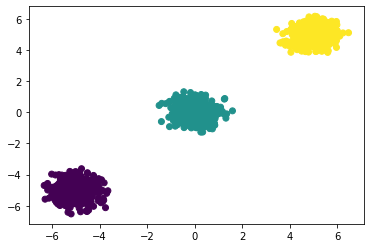

In [4]:
from matplotlib import pyplot as plt

fig1 = plt.figure()
ax1 = plt.axes()

ax1.scatter(X[:, 0], X[:, 1], c=y);

**Question** Modifier un peu les paramètres de votre génération de façon à voir 3 groupes, mais pas complètement séparés.  Les centres doivent être en (2, 1), (-1, -2) et  (1, -1). Appelez ces données `X_blobs`, `y_blobs`.

In [5]:
X_blobs, y_blobs = make_blobs(n_samples=[500,500,500], centers=[[2,1], [-1,-2], [1,-1]], random_state=0, cluster_std=0.5)
print(X_blobs.shape)
print(y_blobs.shape)

(1500, 2)
(1500,)


**Remarque** Vous pouvez choisir la couleur des points en indiquant `c` et `cmap` à l'appel de `scatter`et choisissez la carte des couleurs en regardant `plt.colormaps?`.

In [35]:
plt.colormaps?

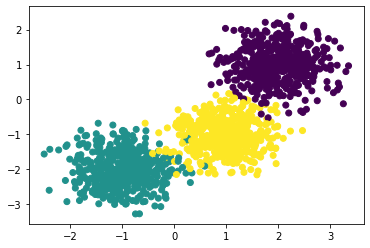

In [6]:
fig2 = plt.figure()
ax2 = plt.axes()

ax2.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs);

On va réaliser maintenant un clustering avec [Kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans). Dans cet algorithme, ([des années 50](https://en.wikipedia.org/wiki/K-means_clustering#History)), on va chercher $k$ points appelés centroïdes tels que la somme des distances des points du jeu de données à son centroïde le plus proche soit minimale. 

De façon formelle

$$\mathop{\mathrm{argmin}}_{c_1,\dots,c_k}\sum_{x\in X}\bigg(\min_{i\in[1,k]}\Vert x-c_i \Vert^2\bigg)$$

Le problème est difficile. On peut considérer qu'il y a de fortes chances qu'il n'existe pas d'algorithme en temps polynomial pour le résoudre. ([Voir](https://www.sciencedirect.com/science/article/pii/S0304397510003269)) 

L'algorithme itère les étapes suivantes: 

1. Choisir $k$ points du jeu de données et les désigner comme centroïdes
2. Tant qu'on n'a pas convergé:
    1. Affecter chaque point à son centroïde le plus proche, constituant au plus $k$ groupes
    2. Calculer les barycentres de chaque groupe. C'est le prochain ensemble de centroïdes
    
L'algorithme converge en fait en temps polynomial, mais l'étape 1 non déterministe, conduit à des solutions qui peuvent être différentes et on trouve alors une solution qui est un minimum local. On peut donc être amené à réitérer l'algorithme plusieurs fois pour tenter de trouver une "bonne" solution. 


**Question** utiliser KMeans pour trouver les clusters et afficher les centroïdes sur le graphique.

![Blobs avec leur centroides](blobsCentroides.png)

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X_blobs)

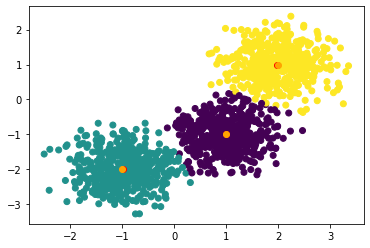

In [9]:
fig3 = plt.figure()
ax3 = plt.axes()

ax3.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred);

ax3.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], c="red");
ax3.scatter(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], c="red");
ax3.scatter(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], c="red");

ax3.scatter([2], [1], c="orange");
ax3.scatter([1], [-1], c="orange");
ax3.scatter([-1], [-2], c="orange");

**Question** Vous pouvez modifier certains paramètres pour voir les effets. Modifiez notamment le nombre de clusters et affichez les résultats.

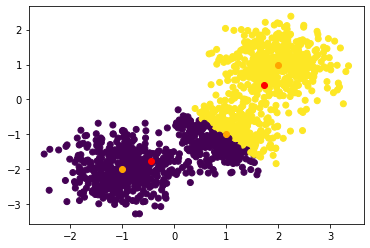

In [10]:
kmeans2 = KMeans(n_clusters=2, random_state=42)
y_pred2 = kmeans2.fit_predict(X_blobs)

fig4 = plt.figure()
ax4 = plt.axes()

ax4.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred2);

ax4.scatter(kmeans2.cluster_centers_[0][0], kmeans2.cluster_centers_[0][1], c="red");
ax4.scatter(kmeans2.cluster_centers_[1][0], kmeans2.cluster_centers_[1][1], c="red");

ax4.scatter([2], [1], c="orange");
ax4.scatter([1], [-1], c="orange");
ax4.scatter([-1], [-2], c="orange");

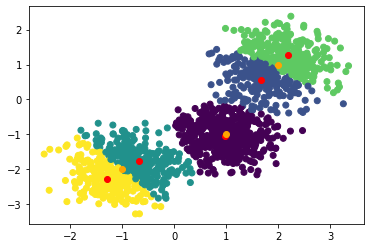

In [11]:
kmeans5 = KMeans(n_clusters=5, random_state=42)
y_pred5 = kmeans5.fit_predict(X_blobs)

fig5 = plt.figure()
ax5 = plt.axes()

ax5.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred5);

ax5.scatter(kmeans5.cluster_centers_[0][0], kmeans5.cluster_centers_[0][1], c="red");
ax5.scatter(kmeans5.cluster_centers_[1][0], kmeans5.cluster_centers_[1][1], c="red");
ax5.scatter(kmeans5.cluster_centers_[2][0], kmeans5.cluster_centers_[2][1], c="red");
ax5.scatter(kmeans5.cluster_centers_[3][0], kmeans5.cluster_centers_[3][1], c="red");
ax5.scatter(kmeans5.cluster_centers_[4][0], kmeans5.cluster_centers_[4][1], c="red");

ax5.scatter([2], [1], c="orange");
ax5.scatter([1], [-1], c="orange");
ax5.scatter([-1], [-2], c="orange");

**Question** Pourquoi existe-t-il un paramètre `n_init`?

*Réponse*

```
n_initint, default=10
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
```

==> Kmeans va choisr K centroides au hasard. Si on se contente d'une seule itération, on peut tomber dans un cas particulier. Pour contrer cela, on va répéter cette opération pour ne pas tomber dans un min locale.

## K-means à la main...

**Question** Définir un nombre de clusters à 3. Sélectionnez dans `id_centroids` trois indices dans l'ensemble de points `X_blobs`. Appelez `centroids` ces trois points.

(*Aide* On utilise `np.random.choice`).

In [12]:
nb_clusters = 3

In [13]:
id_centroides = np.random.randint(len(X_blobs), size=3)
print(id_centroides)

[994 856 685]


In [14]:
centroids = X_blobs[id_centroides]
print(centroids)

[[-1.18508208 -2.4796277 ]
 [ 1.76017209  1.31017915]
 [ 1.49989233  0.22761445]]


**Question** Ah ah! Revenez sur le TD Broadcast pour revoir la méthode qui permet de calculer efficacement la distance au carré de tous les points à ces centroïdes dans une matrice `dist`.

In [15]:
tmp1 = np.sqrt(
    (centroids[0][0] - X_blobs[:,0].reshape(-1,1)) ** 2 
    + 
    (centroids[0][1] - X_blobs[:,1].reshape(-1,1)) ** 2
)

tmp2 = np.sqrt(
    (centroids[1][0] - X_blobs[:,0].reshape(-1,1)) ** 2 
    + 
    (centroids[1][1] - X_blobs[:,1].reshape(-1,1)) ** 2
)

tmp3 = np.sqrt(
    (centroids[2][0] - X_blobs[:,0].reshape(-1,1)) ** 2 
    + 
    (centroids[2][1] - X_blobs[:,1].reshape(-1,1)) ** 2
)

dist = np.hstack((tmp1, tmp2, tmp3))

print(dist.shape)
print(dist)

(1500, 3)
[[1.04458301 4.16671098 3.09605149]
 [2.97574041 2.36467217 1.25948932]
 [0.74571792 4.05618953 3.08405038]
 ...
 [4.25829519 0.56468597 0.56208973]
 [0.16552857 4.69583474 3.69448966]
 [4.86819218 0.24530723 1.09977085]]


**Question** Calculez maintenant `pproche` qui est le résultat de `argmin` sur la matrice des distances. Tracez les points selon une couleur pour indiquer leur centroïde le plus proche.

![Etape 1 de Kmeans](etape1Kmeans.png)

*NB* le dessin va varier selon vos tirages!

In [16]:
argsort_dist_c0 = np.argsort(dist[:,0])
argsort_dist_c1 = np.argsort(dist[:,1])
argsort_dist_c2 = np.argsort(dist[:,2])

#argsort_dist_c2_500 = X_blobs[argsort_dist_c2 < 500]

argsort_dist_c0_500_x = np.take(X_blobs[:,0], argsort_dist_c0)[0:500]
argsort_dist_c0_500_y = np.take(X_blobs[:,1], argsort_dist_c0)[0:500]

argsort_dist_c1_500_x = np.take(X_blobs[:,0], argsort_dist_c1)[0:500]
argsort_dist_c1_500_y = np.take(X_blobs[:,1], argsort_dist_c1)[0:500]

argsort_dist_c2_500_x = np.take(X_blobs[:,0], argsort_dist_c2)[0:500]
argsort_dist_c2_500_y = np.take(X_blobs[:,1], argsort_dist_c2)[0:500]


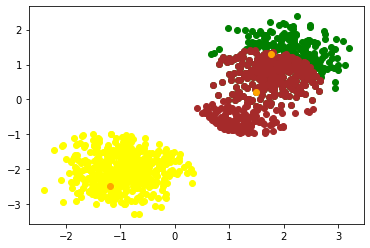

In [17]:
fig6 = plt.figure()
ax6 = plt.axes()

ax6.scatter(argsort_dist_c0_500_x, argsort_dist_c0_500_y, c="yellow");
ax6.scatter(argsort_dist_c1_500_x, argsort_dist_c1_500_y, c="green");
ax6.scatter(argsort_dist_c2_500_x, argsort_dist_c2_500_y, c="brown");

ax6.scatter(X_blobs[id_centroides[0]][0], X_blobs[id_centroides[0]][1], c="orange");
ax6.scatter(X_blobs[id_centroides[1]][0], X_blobs[id_centroides[1]][1], c="orange");
ax6.scatter(X_blobs[id_centroides[2]][0], X_blobs[id_centroides[2]][1], c="orange");

**Question** Le centroïde le plus proche définit donc 3 groupes. Calculer le barycentre de chacun de ces groupes. Cela donne le nd-array appelé `new_centroids`.

In [18]:
c0_barycenter = np.array([argsort_dist_c0_500_x.sum() / 500, argsort_dist_c0_500_y.sum() / 500])
print(c0_barycenter)

[-0.9661501 -2.012528 ]


In [19]:
c1_barycenter = np.array([argsort_dist_c1_500_x.sum() / 500, argsort_dist_c1_500_y.sum() / 500])

In [20]:
c2_barycenter = np.array([argsort_dist_c2_500_x.sum() / 500, argsort_dist_c2_500_y.sum() / 500])

On a réalisé une étape de cet algorithme itératif. Pour savoir si on doit s'arrêter, une façon est de voir si les centroïdes ont bougé ou pas. On peut aussi accepter une certaine tolérance et regarder si les centroïdes ont bougé plus qu'un certain seuil.

**Question** Calculer la somme des differences au carré entre les nouveaux et les anciens centroides.

In [21]:
c0_baryceters_diff = np.sqrt(
    (centroids[0][0] - c0_barycenter[0]) **2
    +
    (centroids[0][1] - c0_barycenter[1]) **2
)

c1_baryceters_diff = np.sqrt(
    (centroids[1][0] - c1_barycenter[0]) **2
    +
    (centroids[1][1] - c1_barycenter[1]) **2
)

c2_baryceters_diff = np.sqrt(
    (centroids[2][0] - c2_barycenter[0]) **2
    +
    (centroids[2][1] - c2_barycenter[1]) **2
)

print(c0_baryceters_diff)
print(c1_baryceters_diff)
print(c2_baryceters_diff)

0.515861740587559
0.3654731982308259
0.1563260321331796


**Question** En déduire un algorithme itératif implanté dans une fonction `my_kmeans`  qui prend en argument, les données, le nombre de clusters, la tolérance pour s'arrêter et un paramètre de verbosité. Si on veut être verbeux, on affichera à chaque  tour la nouvelle différence entre les anciens et nouveaux centroïdes. La fonction retourne les centroïdes et les affectations aux clusters (sous la forme d'un vecteur comme le vecteur de prédiction dans KMeans). 

In [22]:
def my_kmeans(X,nb_cluster,err,verbose=False):
    elem_per_c = int(len(X) / nb_cluster)
    
    centroides_indices = np.random.randint(len(X), size=nb_cluster)      
    centroides = X[centroides_indices]
    c_barycenters_diff = np.Infinity
    
    while c_barycenters_diff > err:
        c_barycenters_diff = 0
        pred = np.full((len(X),1) ,-1)
        for i in range(nb_cluster):
            dist = np.sqrt(
                (X[:,0].reshape(-1,1) - centroides[i][0]) ** 2 
                + 
                (X[:,1].reshape(-1,1) - centroides[i][1]) ** 2
            ) 

            c_indices = np.full((elem_per_c,1) ,-1)
            for n in range(elem_per_c):
                pos = np.argmin(dist)
                while (pred[pos] != -1):
                    pos = np.argmin(dist)
                    dist[pos] = np.Infinity
                pred[pos] = i
                c_indices[n] = pos
              
            c_x = np.take(X[:,0], c_indices)[0:elem_per_c]
            c_y = np.take(X[:,1], c_indices)[0:elem_per_c]
            
            c_barycenter = np.array([c_x.sum() / (len(X)/nb_cluster), c_y.sum() / (len(X)/nb_cluster)])
            c_barycenters_diff += np.sqrt(
                                    (centroides[i][0] - c_barycenter[0]) **2
                                    +
                                    (centroides[i][1] - c_barycenter[1]) **2
                                )
            centroides[i] = c_barycenter
        
        c_barycenters_diff /= 3
        if verbose:
            print("c_barycenters_diff: " + str(c_barycenters_diff))
    
    return pred, centroides

**Question** Faites fonctionner votre algorithme! et affichez vos résultats graphiquement!

c_barycenters_diff: 1.0014214387526863
c_barycenters_diff: 0.19059494702860824


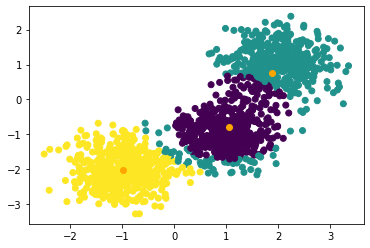

In [23]:
pred, centroides = my_kmeans(X_blobs,3,1,True)

ax7 = plt.figure()
ax7 = plt.axes()

ax7.scatter(X_blobs[:,0], X_blobs[:,1], c=pred);

ax7.scatter(centroides[0][0], centroides[0][1], c="orange");
ax7.scatter(centroides[1][0], centroides[1][1], c="orange");
ax7.scatter(centroides[2][0], centroides[2][1], c="orange");

c_barycenters_diff: 1.1569488616521009
c_barycenters_diff: 0.07033999656635263
c_barycenters_diff: 0.01651562771523297
c_barycenters_diff: 0.003223996193276266
c_barycenters_diff: 7.401486830834377e-17


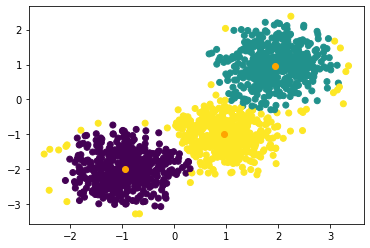

In [24]:
pred, centroides = my_kmeans(X_blobs,3,0.00001,True)

ax7 = plt.figure()
ax7 = plt.axes()

ax7.scatter(X_blobs[:,0], X_blobs[:,1], c=pred);

ax7.scatter(centroides[0][0], centroides[0][1], c="orange");
ax7.scatter(centroides[1][0], centroides[1][1], c="orange");
ax7.scatter(centroides[2][0], centroides[2][1], c="orange");

# Un peu de difficulté pour k-means

**Question** Générer avec `make_moons` N exemples avec un bruit de 0.05 pour obtenir à peu près ceci. Appelez les données `X_moons` et `y_moons`.

![moons](moons.png)

In [25]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(N, noise=0.05, random_state=42)

**Question** Appliquer k-means et observer le résultat. Qu'en pensez-vous ? Donnez une justification du résultat obtenu.

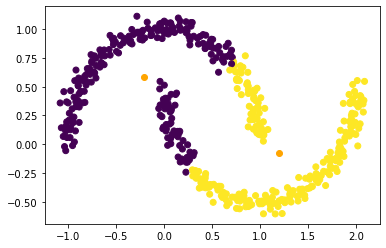

In [26]:
kmeans_moon = KMeans(2, random_state=0)
moon_pred = kmeans_moon.fit_predict(X_moons)

ax8 = plt.figure()
ax8 = plt.axes()

ax8.scatter(X_moons[:,0], X_moons[:,1], c=moon_pred);

ax8.scatter(kmeans_moon.cluster_centers_[0][0], kmeans_moon.cluster_centers_[0][1], c="orange");
ax8.scatter(kmeans_moon.cluster_centers_[1][0], kmeans_moon.cluster_centers_[1][1], c="orange");

*Réponse*

==> On remarque que les centroides sont aux extrémitées du croissant.  
===> Pour avoir deux croissants, il faudrait que les centroides soient au centre de chaque croissant.

# Spectral Clustering 

Dans l'espace de représentation des données, une bonne mesure de distance ou de similarité n'est peut être pas la distance euclidienne. Ou encore, la représentation des données n'est peut être pas la bonne. Trouver la bonne distance ou représentation à utiliser pour des algorithmes comme k-means ou k-plus proches voisins, ce n'est pas facile du tout. Le spectral clustering que nous regarderons plus en détail l'année prochaine fait un kmeans mais dans un autre espace de représentation après une transformation non linéaire.

Pour changer la représentation des données, utilisons `spectral_embedding`. L'idée est de considérer un graphe des k-plus proches voisins, et la distance est comme le temps de parcours moyen dans le graphe pour aller d'un point à un autre. Ainsi on utilise la distance euclidienne uniquement que très localement. 

![localement euclidien](./moonsmanifold.png)

Le graphe des plus proches voisins n'est pas symétrique. C'est un graphe non dirigé. Ici on le transforme en graphe dirigé pour construire la nouvelle représentation des données et la nouvelle distance. 

Le `spectral_embedding` est ensuite un calcul un peu compliqué à expliquer ici qui va grossièrement aboutir à un nouvel espace dans lequel la distance euclidienne correspond au temps de parcours moyen dans pour faire un chemin d'un noeud à un autre du graphe.  

In [27]:
from sklearn.neighbors import kneighbors_graph

nb_voisins = 50
graphe_dirige = kneighbors_graph(X_moons, nb_voisins, include_self=True)
graphe_non_dirige = 0.5 * (graphe_dirige + graphe_dirige.T)

In [28]:
from sklearn.manifold import spectral_embedding
X_moons_spec = spectral_embedding(graphe_non_dirige, n_components=2, drop_first=False)

**Question** Tracer les points dans ce nouvel espace avec leur étiquette réelle. Que constatez-vous ? 

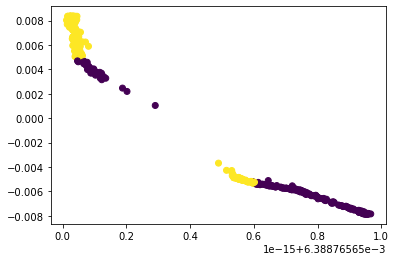

In [29]:
ax9 = plt.figure()
ax9 = plt.axes()

ax9.scatter(X_moons_spec[:,0], X_moons_spec[:,1], c=moon_pred);

*Réponse*

==> On remarque que la représentation a changé !  
===> Il sera plus facile d'appliquer Kmeans

**Question** Réaliser un kmeans dans ce nouvel espace avec 2 clusters. 

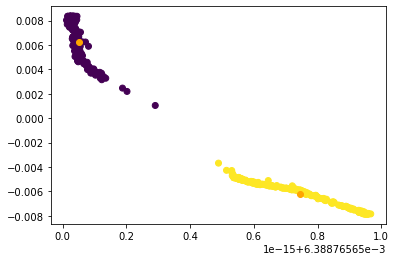

In [30]:
kmeans_spec = KMeans(2, random_state=0)
spec_moon_pred = kmeans_spec.fit_predict(X_moons_spec)

ax10 = plt.figure()
ax10 = plt.axes()

ax10.scatter(X_moons_spec[:,0], X_moons_spec[:,1], c=spec_moon_pred);

ax10.scatter(kmeans_spec.cluster_centers_[0][0], kmeans_spec.cluster_centers_[0][1], c="orange");
ax10.scatter(kmeans_spec.cluster_centers_[1][0], kmeans_spec.cluster_centers_[1][1], c="orange");

Le spectral clustering est très proche de la réalisation d'un spectral embedding suivi d'un K-means. 

**Question** Appliquer `SpectralClustering` sur les deux jeux de données. Et affichez graphiquement les résultats.

/opt/anaconda/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


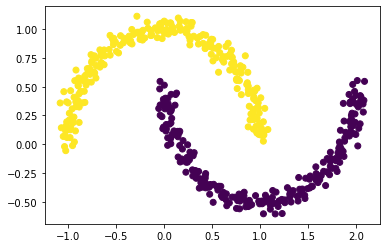

In [31]:
from sklearn.cluster import SpectralClustering
spec_clust = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',)

spec_clust_pred = spec_clust.fit_predict(X_moons)

ax11 = plt.figure()
ax11 = plt.axes()

ax11.scatter(X_moons[:,0], X_moons[:,1], c=spec_clust_pred);

# Quel nombre de clusters ?

**Question** La recherche du nombre de clusters est complexe, surtout en l'absence de supervision... Quelques méthodes tentent de deviner le nombre de clusters. Essayez `DBSCAN` et `AffinityPropagation` d'abord sur les blobs et ensuite sur les moons.  (Mettez le paramètre `eps=.15` pour `DBSCAN`). Tracez les résultats 

Estimated number of clusters: 8
Estimated number of noise points: 116
Homogeneity: 0.862
Completeness: 0.694
V-measure: 0.769
Adjusted Rand Index: 0.822
Adjusted Mutual Information: 0.768
Silhouette Coefficient: 0.161


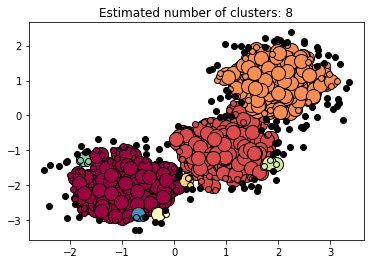

In [32]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=0.15).fit(X_blobs)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_blobs, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_blobs, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_blobs, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_blobs, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_blobs, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_blobs, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_blobs[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_blobs[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.334


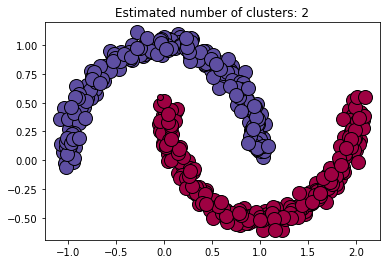

In [33]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=0.15).fit(X_moons)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_moons, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_moons, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_moons, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_moons, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_moons, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_moons, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_moons[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_moons[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [34]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

# Compute Affinity Propagation
af = AffinityPropagation(random_state=42).fit(X_blobs)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_blobs, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_blobs, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_blobs, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_blobs, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_blobs, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_blobs, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_blobs[cluster_centers_indices[k]]
    plt.plot(X_blobs[class_members, 0], X_blobs[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X_blobs[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of clusters: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


/opt/anaconda/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:243: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [35]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

# Compute Affinity Propagation
af = AffinityPropagation(random_state=42).fit(X_moons)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_moons, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_moons, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_moons, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_moons, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_moons, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_moons, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_moons[cluster_centers_indices[k]]
    plt.plot(X_moons[class_members, 0], X_moons[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X_moons[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of clusters: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


/opt/anaconda/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:243: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)